In [1]:
# Set Up Google Colab Environment & Install Packages
!pip install python-louvain

# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community as community_louvain
from collections import Counter

# Optional: adjust matplotlib for better plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)


Zachary's Karate Club Graph
Number of nodes: 34
Number of edges: 78


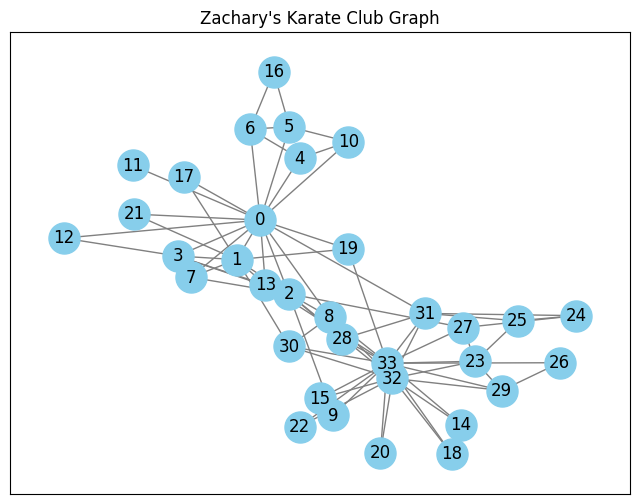

In [2]:
# Load and visualize Zachary's Karate Club graph
karate = nx.karate_club_graph()

# Basic information
print("Zachary's Karate Club Graph")
print("Number of nodes:", karate.number_of_nodes())
print("Number of edges:", karate.number_of_edges())

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(karate, seed=42)
nx.draw_networkx(karate, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500)
plt.title("Zachary's Karate Club Graph")
plt.show()


In [3]:
# Compute Centrality & Clustering Metrics (Karate Club)
# Degree centrality
degree_centrality = nx.degree_centrality(karate)

# Closeness centrality
closeness_centrality = nx.closeness_centrality(karate)

# Betweenness centrality
betweenness_centrality = nx.betweenness_centrality(karate)

# Eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(karate)

# Local clustering coefficients
clustering_coeffs = nx.clustering(karate)

# Display some sample values
print("Sample Centrality & Clustering Metrics:")
for n in list(karate.nodes())[:5]:
    print(f"Node {n}: Degree {degree_centrality[n]:.3f}, Closeness {closeness_centrality[n]:.3f}, "
          f"Betweenness {betweenness_centrality[n]:.3f}, Eigenvector {eigenvector_centrality[n]:.3f}, "
          f"Clustering {clustering_coeffs[n]:.3f}")

# Compute global average clustering coefficient
avg_clustering = nx.average_clustering(karate)
print("\nGlobal average clustering coefficient:", avg_clustering)


Sample Centrality & Clustering Metrics:
Node 0: Degree 0.485, Closeness 0.569, Betweenness 0.438, Eigenvector 0.355, Clustering 0.150
Node 1: Degree 0.273, Closeness 0.485, Betweenness 0.054, Eigenvector 0.266, Clustering 0.333
Node 2: Degree 0.303, Closeness 0.559, Betweenness 0.144, Eigenvector 0.317, Clustering 0.244
Node 3: Degree 0.182, Closeness 0.465, Betweenness 0.012, Eigenvector 0.211, Clustering 0.667
Node 4: Degree 0.091, Closeness 0.379, Betweenness 0.001, Eigenvector 0.076, Clustering 0.667

Global average clustering coefficient: 0.5706384782076823


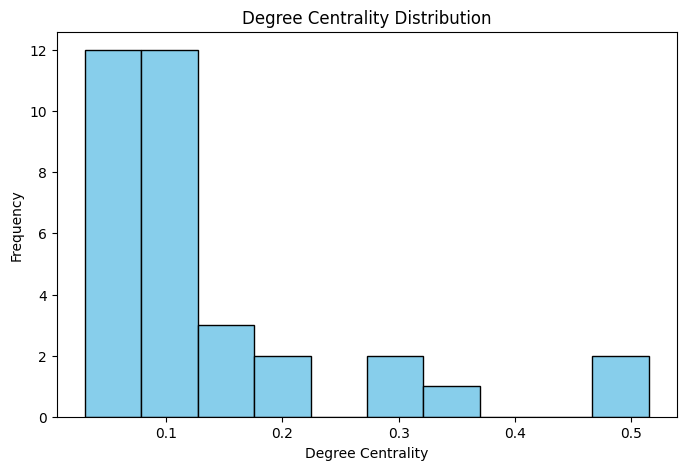

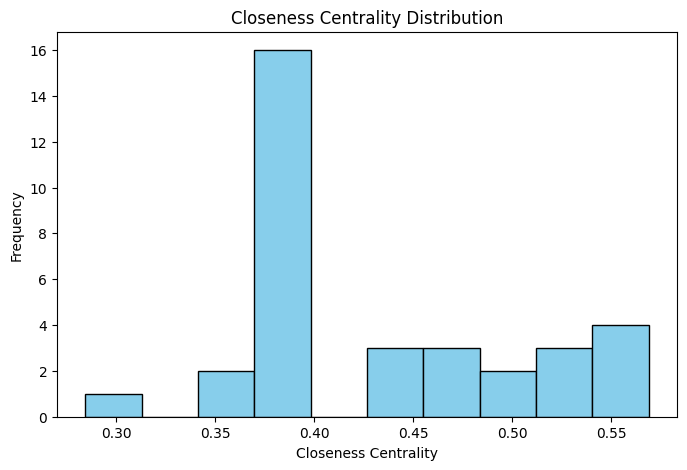

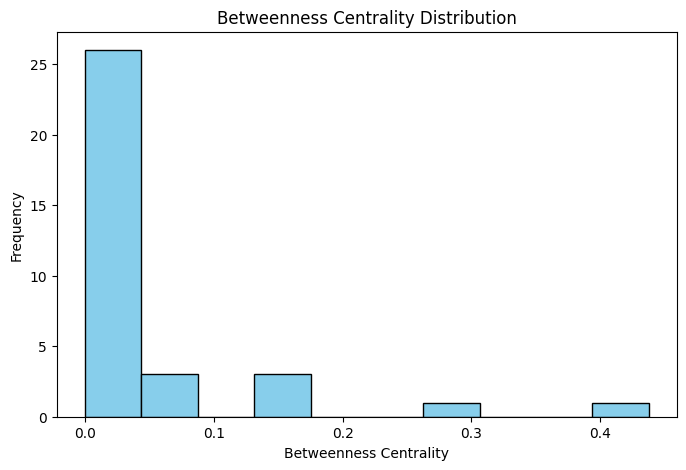

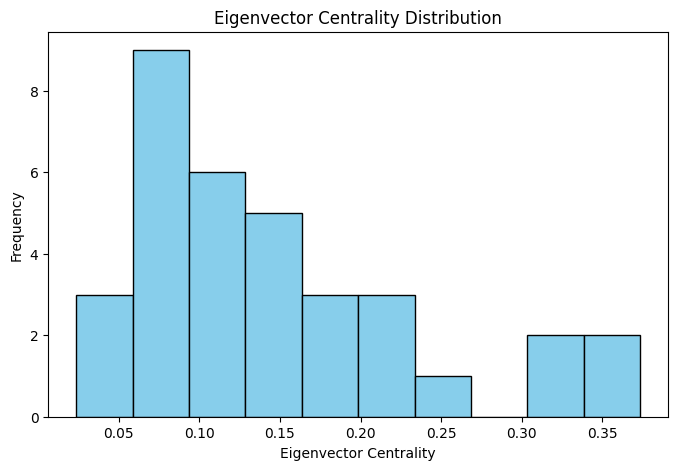

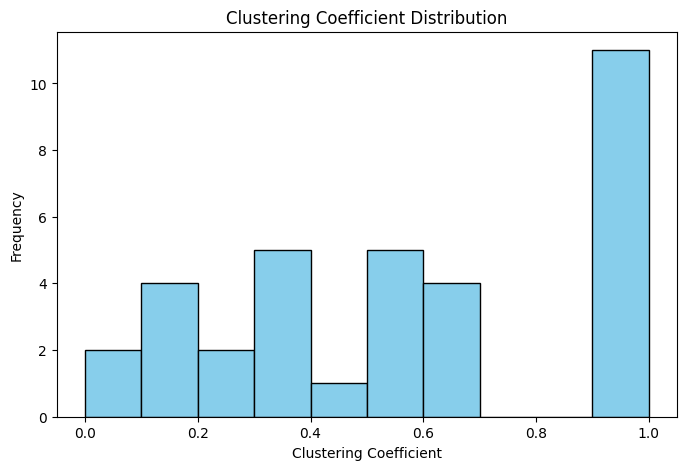

In [4]:
#Visualize Centrality Distributions (Karate Club)
# Helper function to plot centrality distributions
def plot_centrality_distribution(values, title, xlabel):
    plt.figure(figsize=(8, 5))
    plt.hist(list(values.values()), bins=10, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plot degree centrality distribution
plot_centrality_distribution(degree_centrality, "Degree Centrality Distribution", "Degree Centrality")

# Plot closeness centrality distribution
plot_centrality_distribution(closeness_centrality, "Closeness Centrality Distribution", "Closeness Centrality")

# Plot betweenness centrality distribution
plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality Distribution", "Betweenness Centrality")

# Plot eigenvector centrality distribution
plot_centrality_distribution(eigenvector_centrality, "Eigenvector Centrality Distribution", "Eigenvector Centrality")

# Plot clustering coefficient distribution
plot_centrality_distribution(clustering_coeffs, "Clustering Coefficient Distribution", "Clustering Coefficient")


First level communities detected by Girvan–Newman:
Community 1: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Community 2: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


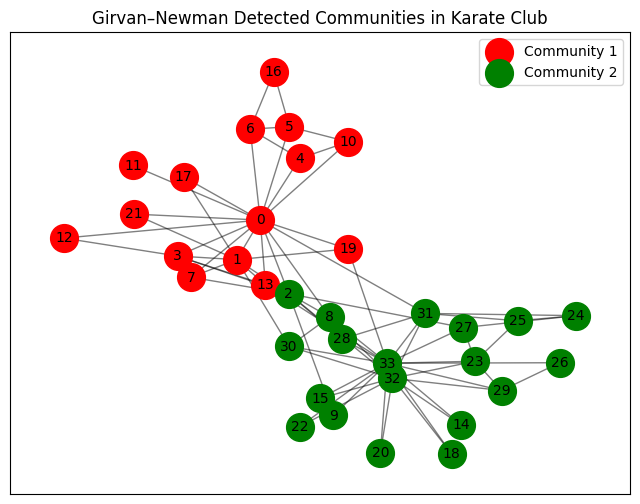

In [5]:
# Community Detection (Girvan–Newman) (Karate Club)
from networkx.algorithms.community import girvan_newman

# Generate communities using Girvan–Newman algorithm
comp = girvan_newman(karate)

# Convert to list of sets of nodes (first level split)
first_level_communities = next(comp)

# Convert to sorted lists for easier reading
communities = [sorted(list(c)) for c in first_level_communities]
print("First level communities detected by Girvan–Newman:")
for i, c in enumerate(communities):
    print(f"Community {i+1}: {c}")

# Visualize the communities
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange']
pos = nx.spring_layout(karate, seed=42)
for i, community in enumerate(first_level_communities):
    nx.draw_networkx_nodes(karate, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=400)
nx.draw_networkx_edges(karate, pos, alpha=0.5)
nx.draw_networkx_labels(karate, pos, font_size=10, font_color='black')
plt.title("Girvan–Newman Detected Communities in Karate Club")
plt.legend()
plt.show()


Number of communities detected by Louvain: 4


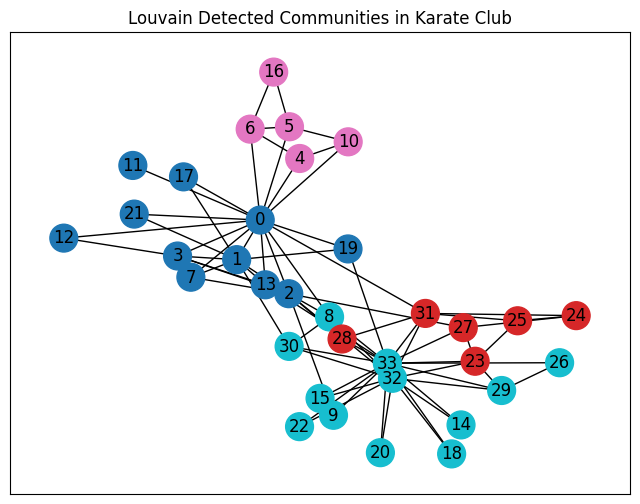

In [6]:
# Louvain community detection (Karate Club)
partition = community_louvain.best_partition(karate)

# Number of communities
num_communities = len(set(partition.values()))
print("Number of communities detected by Louvain:", num_communities)

# Visualize the Louvain communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(karate, seed=42)
colors = [partition[node] for node in karate.nodes()]
nx.draw_networkx(karate, pos, node_color=colors, with_labels=True, cmap=plt.cm.tab10, node_size=400)
plt.title("Louvain Detected Communities in Karate Club")
plt.show()


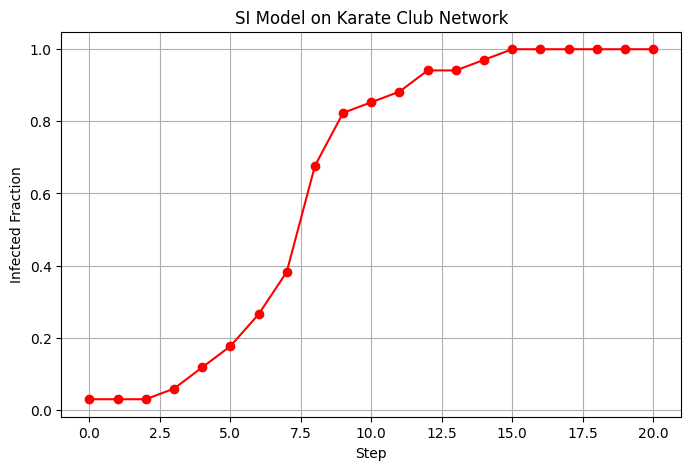

In [7]:
# SI Spreading Model on the Karate Club Network
import random

def simulate_si(graph, beta=0.1, steps=20, initial_infected=None):
    # Initialize states: 'S' for susceptible, 'I' for infected
    states = {node: 'S' for node in graph.nodes()}

    # If no initial infected node given, choose randomly
    if initial_infected is None:
        initial_infected = random.choice(list(graph.nodes()))

    states[initial_infected] = 'I'

    # Track infected fraction at each step
    infected_fraction = [1 / graph.number_of_nodes()]

    for _ in range(steps):
        new_states = states.copy()
        for node in graph.nodes():
            if states[node] == 'I':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if states[neighbor] == 'S' and random.random() < beta:
                        new_states[neighbor] = 'I'
        states = new_states
        infected_fraction.append(list(states.values()).count('I') / graph.number_of_nodes())

    return infected_fraction

# Run the simulation
infected_fraction = simulate_si(karate, beta=0.2, steps=20)

# Plot infected fraction over time
plt.figure(figsize=(8, 5))
plt.plot(infected_fraction, marker='o', color='red')
plt.title("SI Model on Karate Club Network")
plt.xlabel("Step")
plt.ylabel("Infected Fraction")
plt.grid(True)
plt.show()


Les Misérables Graph
Number of nodes: 77
Number of edges: 254


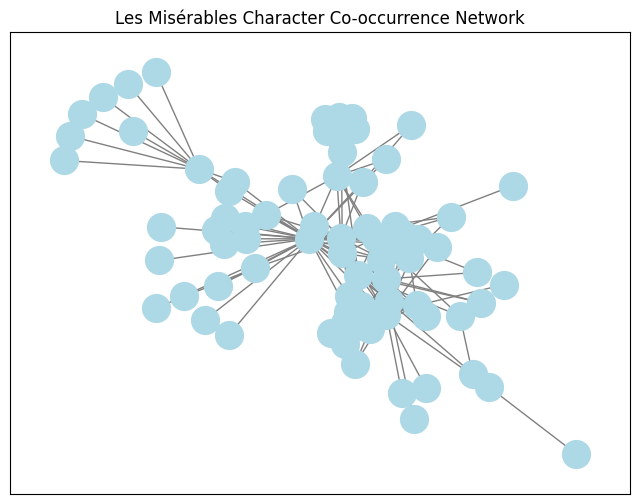

In [10]:
# Load the Les Misérables network (built-in in NetworkX)
les_mis = nx.les_miserables_graph()

# Basic information
print("Les Misérables Graph")
print("Number of nodes:", les_mis.number_of_nodes())
print("Number of edges:", les_mis.number_of_edges())

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(les_mis, seed=42)
nx.draw_networkx(les_mis, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=400)
plt.title("Les Misérables Character Co-occurrence Network")
plt.show()


In [11]:
# Compute Centrality & Clustering Metrics (Les Misérables)
# Degree centrality
degree_centrality_lesmis = nx.degree_centrality(les_mis)

# Closeness centrality
closeness_centrality_lesmis = nx.closeness_centrality(les_mis)

# Betweenness centrality
betweenness_centrality_lesmis = nx.betweenness_centrality(les_mis)

# Eigenvector centrality
eigenvector_centrality_lesmis = nx.eigenvector_centrality(les_mis)

# Local clustering coefficients
clustering_coeffs_lesmis = nx.clustering(les_mis)

# Display some sample values
print("Sample Centrality & Clustering Metrics (Les Misérables):")
for n in list(les_mis.nodes())[:5]:
    print(f"Node {n}: Degree {degree_centrality_lesmis[n]:.3f}, Closeness {closeness_centrality_lesmis[n]:.3f}, "
          f"Betweenness {betweenness_centrality_lesmis[n]:.3f}, Eigenvector {eigenvector_centrality_lesmis[n]:.3f}, "
          f"Clustering {clustering_coeffs_lesmis[n]:.3f}")

# Compute global average clustering coefficient
avg_clustering_lesmis = nx.average_clustering(les_mis)
print("\nGlobal average clustering coefficient (Les Misérables):", avg_clustering_lesmis)


Sample Centrality & Clustering Metrics (Les Misérables):
Node Napoleon: Degree 0.013, Closeness 0.302, Betweenness 0.000, Eigenvector 0.002, Clustering 0.000
Node Myriel: Degree 0.132, Closeness 0.429, Betweenness 0.177, Eigenvector 0.028, Clustering 0.067
Node MlleBaptistine: Degree 0.039, Closeness 0.413, Betweenness 0.000, Eigenvector 0.027, Clustering 1.000
Node MmeMagloire: Degree 0.039, Closeness 0.413, Betweenness 0.000, Eigenvector 0.027, Clustering 1.000
Node CountessDeLo: Degree 0.013, Closeness 0.302, Betweenness 0.000, Eigenvector 0.002, Clustering 0.000

Global average clustering coefficient (Les Misérables): 0.5731367499320134


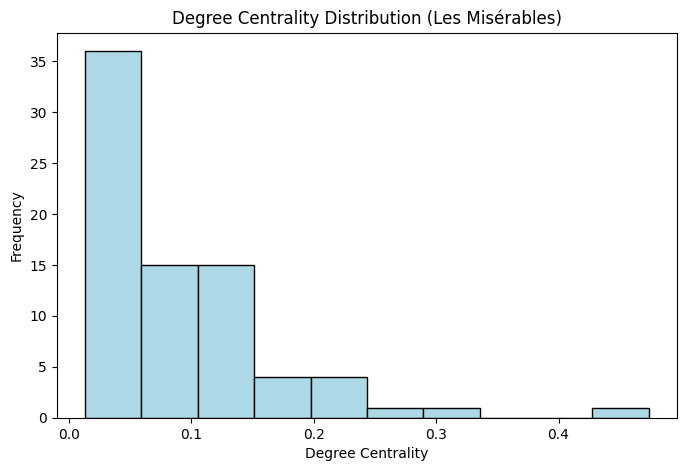

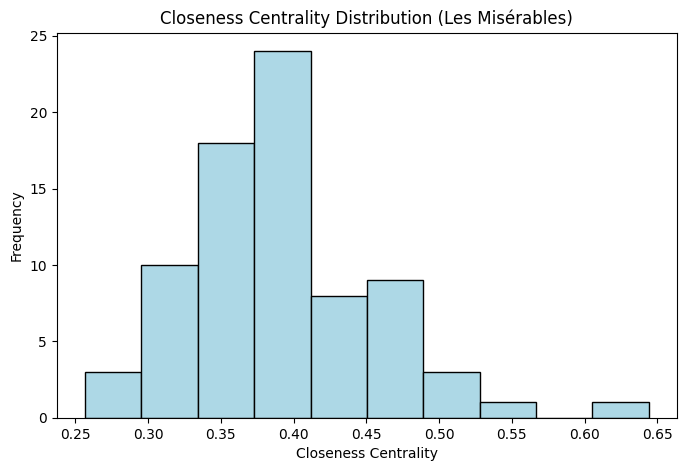

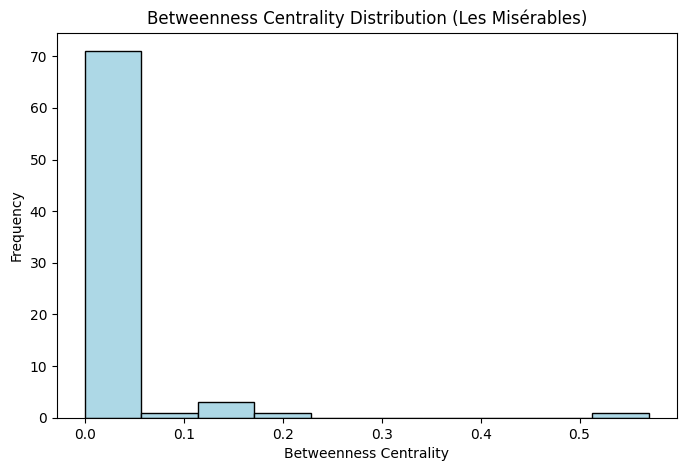

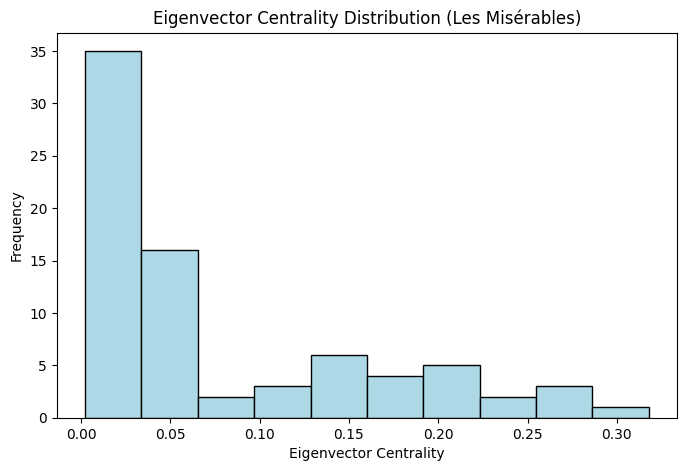

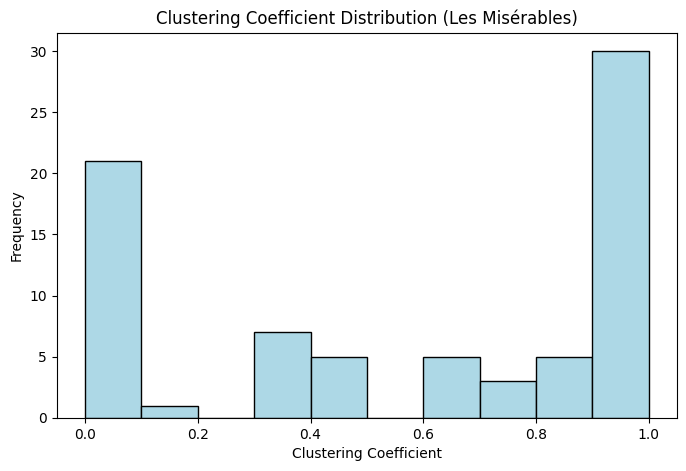

In [13]:
# Visualize Centrality Distributions (Les Misérables)
# Helper function to plot centrality distributions
def plot_centrality_distribution_lesmis(values, title, xlabel):
    plt.figure(figsize=(8, 5))
    plt.hist(list(values.values()), bins=10, color='lightblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plot degree centrality distribution
plot_centrality_distribution_lesmis(degree_centrality_lesmis, "Degree Centrality Distribution (Les Misérables)", "Degree Centrality")

# Plot closeness centrality distribution
plot_centrality_distribution_lesmis(closeness_centrality_lesmis, "Closeness Centrality Distribution (Les Misérables)", "Closeness Centrality")

# Plot betweenness centrality distribution
plot_centrality_distribution_lesmis(betweenness_centrality_lesmis, "Betweenness Centrality Distribution (Les Misérables)", "Betweenness Centrality")

# Plot eigenvector centrality distribution
plot_centrality_distribution_lesmis(eigenvector_centrality_lesmis, "Eigenvector Centrality Distribution (Les Misérables)", "Eigenvector Centrality")

# Plot clustering coefficient distribution
plot_centrality_distribution_lesmis(clustering_coeffs_lesmis, "Clustering Coefficient Distribution (Les Misérables)", "Clustering Coefficient")


First level communities detected by Girvan–Newman (Les Misérables):
Community 1: ['Champtercier', 'Count', 'CountessDeLo', 'Cravatte', 'Geborand', 'MlleBaptistine', 'MmeMagloire', 'Myriel', 'Napoleon', 'OldMan']
Community 2: ['Anzelma', 'Babet', 'Bahorel', 'Bamatabois', 'BaronessT', 'Blacheville', 'Bossuet', 'Boulatruelle', 'Brevet', 'Brujon', 'Champmathieu', 'Chenildieu', 'Child1', 'Child2', 'Claquesous', 'Cochepaille', 'Combeferre', 'Cosette', 'Courfeyrac', 'Dahlia', 'Enjolras', 'Eponine', 'Fameuil', 'Fantine', 'Fauchelevent', 'Favourite', 'Feuilly', 'Gavroche', 'Gervais', 'Gillenormand', 'Grantaire', 'Gribier', 'Gueulemer', 'Isabeau', 'Javert', 'Joly', 'Jondrette', 'Judge', 'Labarre', 'Listolier', 'LtGillenormand', 'Mabeuf', 'Magnon', 'Marguerite', 'Marius', 'MlleGillenormand', 'MlleVaubois', 'MmeBurgon', 'MmeDeR', 'MmeHucheloup', 'MmePontmercy', 'MmeThenardier', 'Montparnasse', 'MotherInnocent', 'MotherPlutarch', 'Perpetue', 'Pontmercy', 'Prouvaire', 'Scaufflaire', 'Simplice', 'The

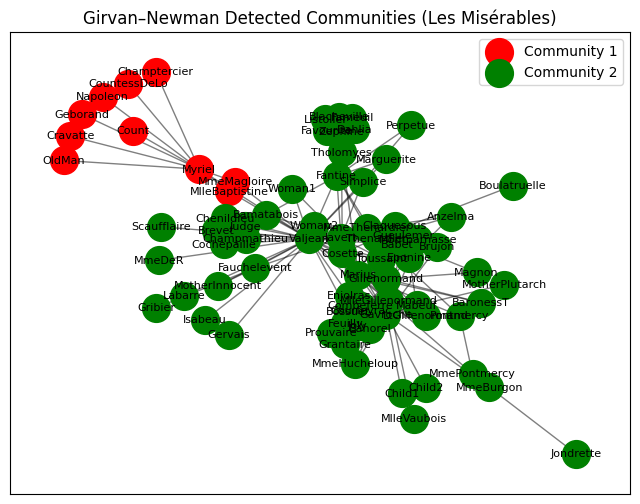

In [14]:
# Community Detection (Girvan–Newman) — Les Misérables
from networkx.algorithms.community import girvan_newman

# Generate communities using Girvan–Newman algorithm
comp_lesmis = girvan_newman(les_mis)

# Convert to list of sets of nodes (first level split)
first_level_communities_lesmis = next(comp_lesmis)

# Convert to sorted lists for easier reading
communities_lesmis = [sorted(list(c)) for c in first_level_communities_lesmis]
print("First level communities detected by Girvan–Newman (Les Misérables):")
for i, c in enumerate(communities_lesmis):
    print(f"Community {i+1}: {c}")

# Visualize the communities
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue', 'purple', 'orange']
pos = nx.spring_layout(les_mis, seed=42)
for i, community in enumerate(first_level_communities_lesmis):
    nx.draw_networkx_nodes(les_mis, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=400)
nx.draw_networkx_edges(les_mis, pos, alpha=0.5)
nx.draw_networkx_labels(les_mis, pos, font_size=8, font_color='black')
plt.title("Girvan–Newman Detected Communities (Les Misérables)")
plt.legend()
plt.show()


Number of communities detected by Louvain (Les Misérables): 6


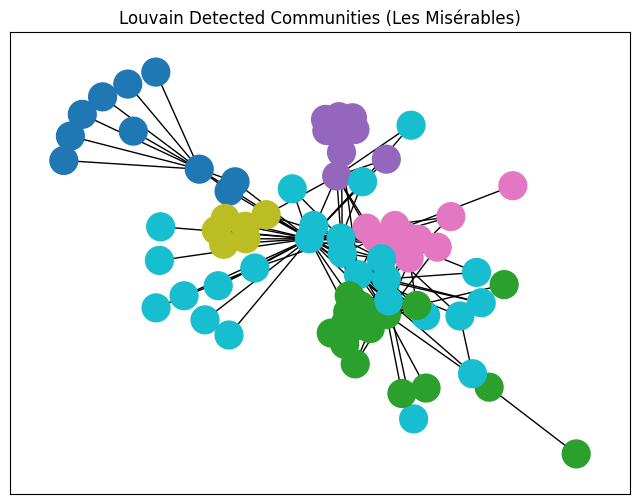

In [15]:
# Louvain community detection (Les Misérables)
partition_lesmis = community_louvain.best_partition(les_mis)

# Number of communities
num_communities_lesmis = len(set(partition_lesmis.values()))
print("Number of communities detected by Louvain (Les Misérables):", num_communities_lesmis)

# Visualize the Louvain communities
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(les_mis, seed=42)
colors = [partition_lesmis[node] for node in les_mis.nodes()]
nx.draw_networkx(les_mis, pos, node_color=colors, with_labels=False, cmap=plt.cm.tab10, node_size=400)
plt.title("Louvain Detected Communities (Les Misérables)")
plt.show()


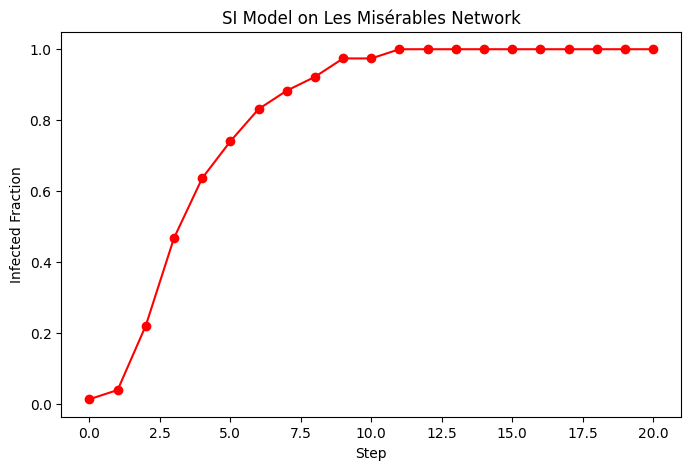

In [16]:
# SI Spreading Model (Les Misérables)
def simulate_si(graph, beta=0.1, steps=20, initial_infected=None):
    # Initialize states: 'S' for susceptible, 'I' for infected
    states = {node: 'S' for node in graph.nodes()}

    # If no initial infected node given, choose randomly
    if initial_infected is None:
        initial_infected = random.choice(list(graph.nodes()))

    states[initial_infected] = 'I'

    # Track infected fraction at each step
    infected_fraction = [1 / graph.number_of_nodes()]

    for _ in range(steps):
        new_states = states.copy()
        for node in graph.nodes():
            if states[node] == 'I':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if states[neighbor] == 'S' and random.random() < beta:
                        new_states[neighbor] = 'I'
        states = new_states
        infected_fraction.append(list(states.values()).count('I') / graph.number_of_nodes())

    return infected_fraction

# Run the simulation
infected_fraction_lesmis = simulate_si(les_mis, beta=0.2, steps=20)

# Plot infected fraction over time
plt.figure(figsize=(8, 5))
plt.plot(infected_fraction_lesmis, marker='o', color='red')
plt.title("SI Model on Les Misérables Network")
plt.xlabel("Step")
plt.ylabel("Infected Fraction")
plt.show()


College Football: 115 nodes, 613 edges


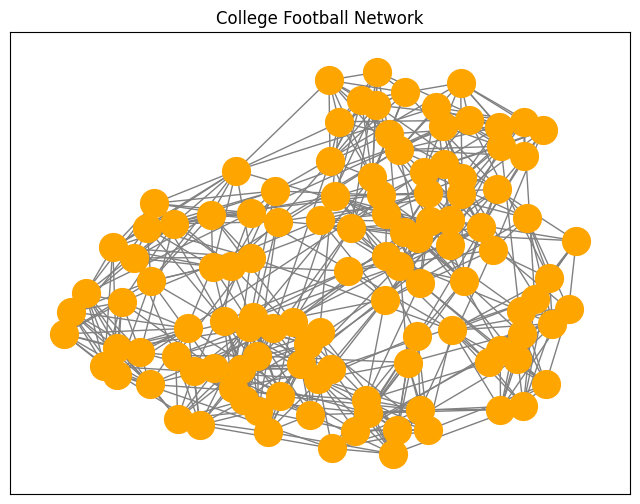

In [19]:
# Load & Visualize College Football Graph
import urllib.request, io, zipfile

# 1) Download the ZIP archive
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
response = urllib.request.urlopen(url)
data = response.read()
response.close()

# 2) Unzip in memory
zf = zipfile.ZipFile(io.BytesIO(data))

# 3) Read and clean the GML text (drop the first comment line)
gml_text = zf.read("football.gml").decode().split("\n")[1:]

# 4) Parse into a NetworkX graph
football = nx.parse_gml(gml_text)

# 5) Check it loaded correctly
print("College Football:", football.number_of_nodes(), "nodes,", football.number_of_edges(), "edges")

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(football, seed=42)
nx.draw_networkx(football, pos, with_labels=False, node_color='orange', edge_color='gray', node_size=400)
plt.title("College Football Network")
plt.show()


In [20]:
# Centrality & Clustering Metrics (College Football)
# Degree centrality
degree_centrality_football = nx.degree_centrality(football)

# Closeness centrality
closeness_centrality_football = nx.closeness_centrality(football)

# Betweenness centrality
betweenness_centrality_football = nx.betweenness_centrality(football)

# Eigenvector centrality
eigenvector_centrality_football = nx.eigenvector_centrality(football)

# Local clustering coefficients
clustering_coeffs_football = nx.clustering(football)

# Display some sample values
print("Sample Centrality & Clustering Metrics (College Football):")
for n in list(football.nodes())[:5]:
    print(f"Node {n}: Degree {degree_centrality_football[n]:.3f}, Closeness {closeness_centrality_football[n]:.3f}, "
          f"Betweenness {betweenness_centrality_football[n]:.3f}, Eigenvector {eigenvector_centrality_football[n]:.3f}, "
          f"Clustering {clustering_coeffs_football[n]:.3f}")

# Compute global average clustering coefficient
avg_clustering_football = nx.average_clustering(football)
print("\nGlobal average clustering coefficient (College Football):", avg_clustering_football)


Sample Centrality & Clustering Metrics (College Football):
Node BrighamYoung: Degree 0.105, Closeness 0.424, Betweenness 0.032, Eigenvector 0.107, Clustering 0.348
Node FloridaState: Degree 0.105, Closeness 0.413, Betweenness 0.018, Eigenvector 0.096, Clustering 0.439
Node Iowa: Degree 0.105, Closeness 0.407, Betweenness 0.013, Eigenvector 0.116, Clustering 0.379
Node KansasState: Degree 0.105, Closeness 0.421, Betweenness 0.023, Eigenvector 0.106, Clustering 0.333
Node NewMexico: Degree 0.096, Closeness 0.403, Betweenness 0.011, Eigenvector 0.101, Clustering 0.418

Global average clustering coefficient (College Football): 0.40321601104209814


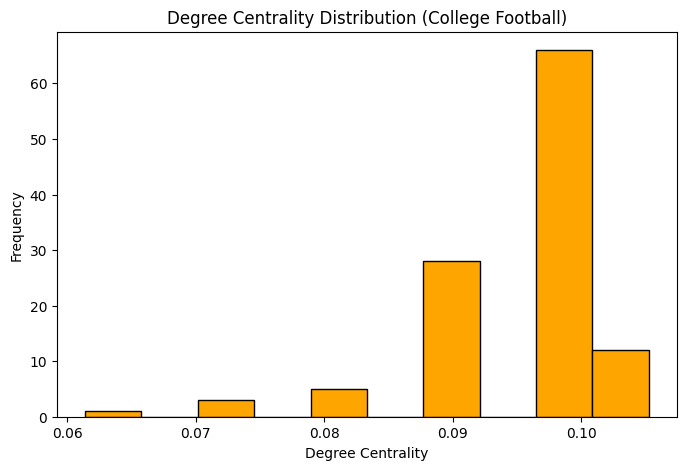

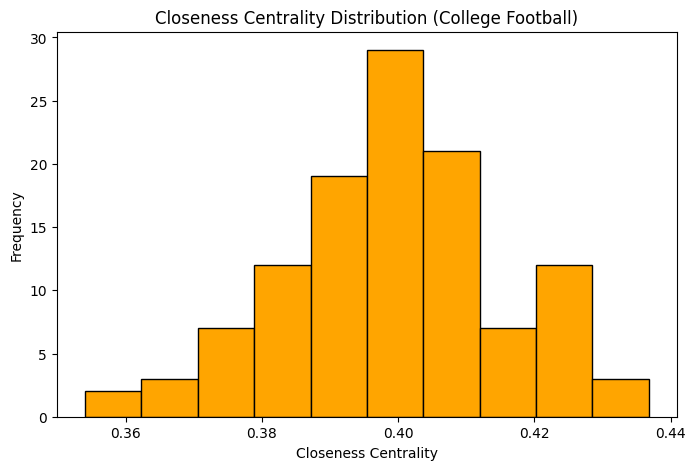

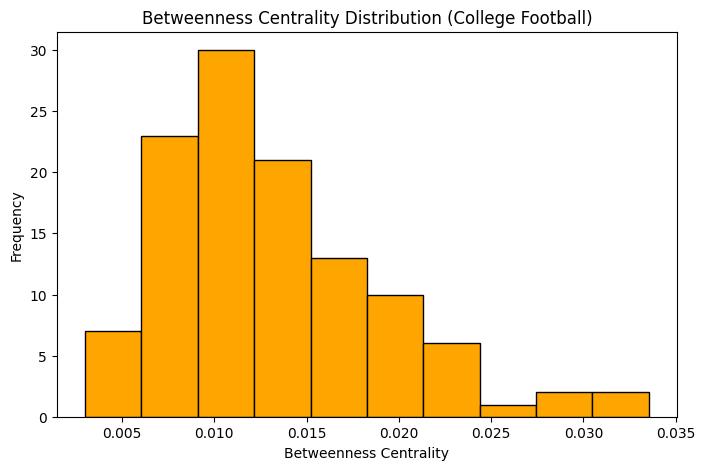

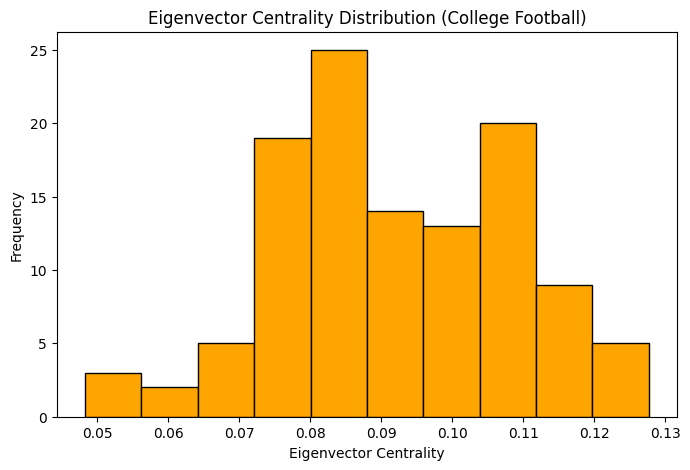

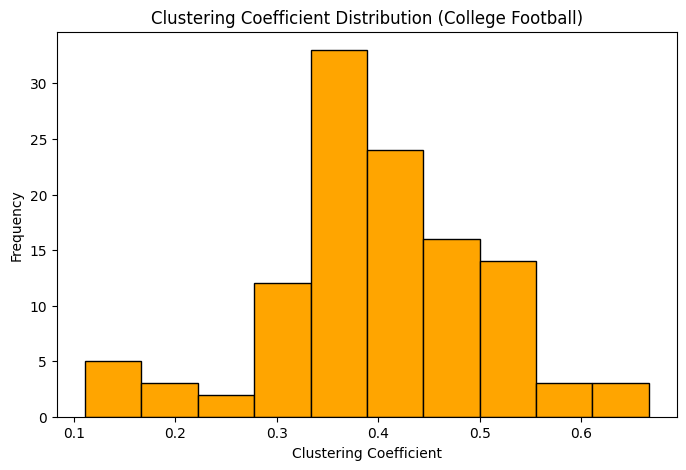

In [21]:
# Visualize Centrality Distributions (College Football)
# Helper function to plot centrality distributions
def plot_centrality_distribution_football(values, title, xlabel):
    plt.figure(figsize=(8, 5))
    plt.hist(list(values.values()), bins=10, color='orange', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plot degree centrality distribution
plot_centrality_distribution_football(degree_centrality_football, "Degree Centrality Distribution (College Football)", "Degree Centrality")

# Plot closeness centrality distribution
plot_centrality_distribution_football(closeness_centrality_football, "Closeness Centrality Distribution (College Football)", "Closeness Centrality")

# Plot betweenness centrality distribution
plot_centrality_distribution_football(betweenness_centrality_football, "Betweenness Centrality Distribution (College Football)", "Betweenness Centrality")

# Plot eigenvector centrality distribution
plot_centrality_distribution_football(eigenvector_centrality_football, "Eigenvector Centrality Distribution (College Football)", "Eigenvector Centrality")

# Plot clustering coefficient distribution
plot_centrality_distribution_football(clustering_coeffs_football, "Clustering Coefficient Distribution (College Football)", "Clustering Coefficient")


First level communities detected by Girvan–Newman (College Football):
Community 1: ['AirForce', 'Arizona', 'ArizonaState', 'ArkansasState', 'Baylor', 'BoiseState', 'BrighamYoung', 'California', 'Colorado', 'ColoradoState', 'FresnoState', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'IowaState', 'Kansas', 'KansasState', 'Michigan', 'MichiganState', 'Minnesota', 'Missouri', 'Nebraska', 'Nevada', 'NevadaLasVegas', 'NewMexico', 'NewMexicoState', 'NorthTexas', 'Northwestern', 'NotreDame', 'OhioState', 'Oklahoma', 'OklahomaState', 'Oregon', 'OregonState', 'PennState', 'Purdue', 'Rice', 'SanDiegoState', 'SanJoseState', 'SouthernCalifornia', 'SouthernMethodist', 'Stanford', 'Texas', 'TexasA&M', 'TexasChristian', 'TexasElPaso', 'TexasTech', 'Tulsa', 'UCLA', 'Utah', 'UtahState', 'Washington', 'WashingtonState', 'Wisconsin', 'Wyoming']
Community 2: ['Akron', 'Alabama', 'AlabamaBirmingham', 'Arkansas', 'Army', 'Auburn', 'BallState', 'BostonCollege', 'BowlingGreenState', 'Buffalo', 'CentralFlo

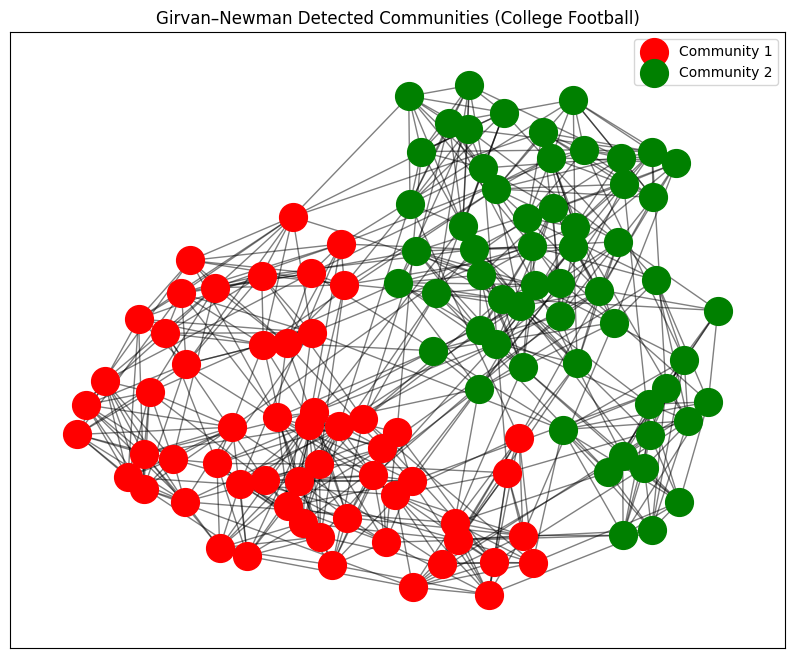

In [22]:
# Community detection using Girvan–Newman — College Football
comp_football = girvan_newman(football)

# First level split
first_level_communities_football = next(comp_football)

# Convert to sorted lists
communities_football = [sorted(list(c)) for c in first_level_communities_football]
print("First level communities detected by Girvan–Newman (College Football):")
for i, c in enumerate(communities_football):
    print(f"Community {i+1}: {c}")

# Visualize the communities
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
pos = nx.spring_layout(football, seed=42)
for i, community in enumerate(first_level_communities_football):
    nx.draw_networkx_nodes(football, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=400)
nx.draw_networkx_edges(football, pos, alpha=0.5)
plt.title("Girvan–Newman Detected Communities (College Football)")
plt.legend()
plt.show()


Number of communities detected by Louvain (College Football): 10


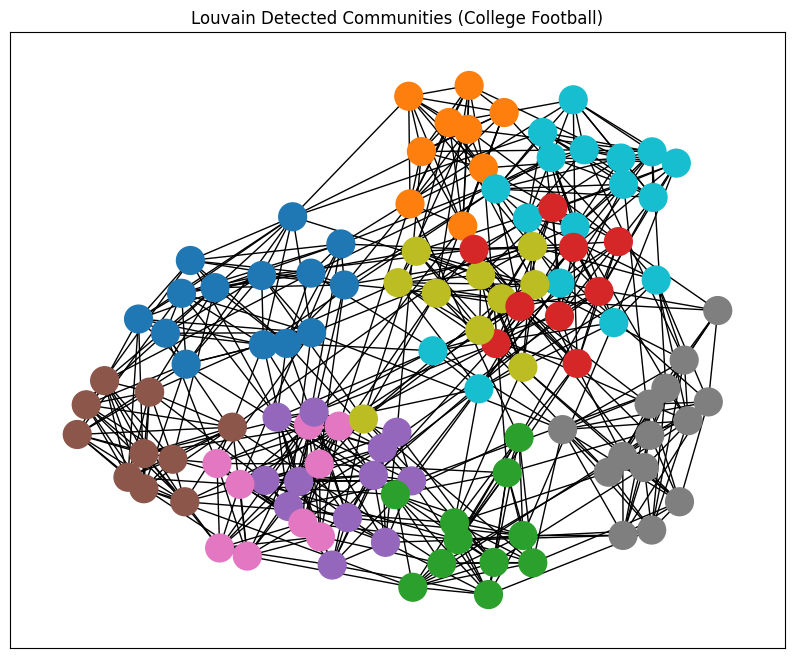

In [23]:
# Louvain community detection (College Football)
partition_football = community_louvain.best_partition(football)

# Number of communities
num_communities_football = len(set(partition_football.values()))
print("Number of communities detected by Louvain (College Football):", num_communities_football)

# Visualize the Louvain communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(football, seed=42)
colors = [partition_football[node] for node in football.nodes()]
nx.draw_networkx(football, pos, node_color=colors, with_labels=False, cmap=plt.cm.tab10, node_size=400)
plt.title("Louvain Detected Communities (College Football)")
plt.show()


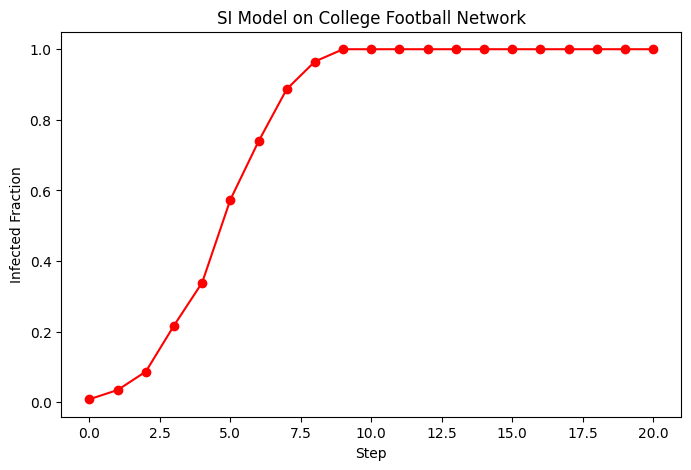

In [24]:
# SI Spreading Model (College Football)
def simulate_si(graph, beta=0.1, steps=20, initial_infected=None):
    # Initialize states: 'S' for susceptible, 'I' for infected
    states = {node: 'S' for node in graph.nodes()}

    # If no initial infected node given, choose randomly
    if initial_infected is None:
        initial_infected = random.choice(list(graph.nodes()))

    states[initial_infected] = 'I'

    # Track infected fraction at each step
    infected_fraction = [1 / graph.number_of_nodes()]

    for _ in range(steps):
        new_states = states.copy()
        for node in graph.nodes():
            if states[node] == 'I':
                neighbors = list(graph.neighbors(node))
                for neighbor in neighbors:
                    if states[neighbor] == 'S' and random.random() < beta:
                        new_states[neighbor] = 'I'
        states = new_states
        infected_fraction.append(list(states.values()).count('I') / graph.number_of_nodes())

    return infected_fraction

# Run the simulation
infected_fraction_football = simulate_si(football, beta=0.2, steps=20)

# Plot infected fraction over time
plt.figure(figsize=(8, 5))
plt.plot(infected_fraction_football, marker='o', color='red')
plt.title("SI Model on College Football Network")
plt.xlabel("Step")
plt.ylabel("Infected Fraction")
plt.show()


Email-Eu-core Network
Number of nodes: 1005
Number of edges: 16706


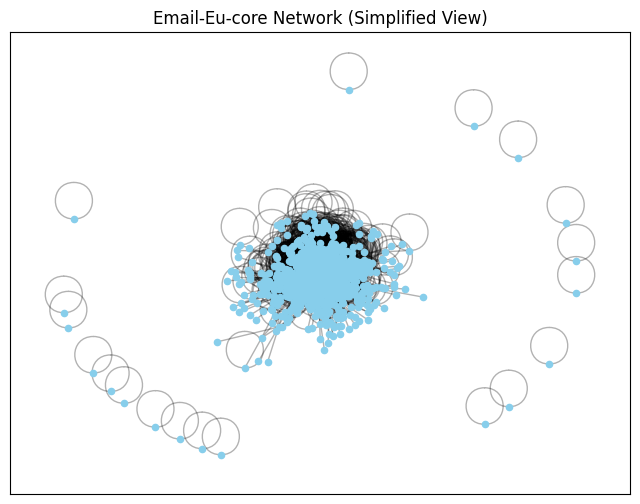

In [25]:
# Load & Visualize the Email-Eu-core Network
# Download the edge list file
!wget -q https://snap.stanford.edu/data/email-Eu-core.txt.gz -O email-Eu-core.txt.gz

# Unzip
!gunzip -f email-Eu-core.txt.gz

# Load as an undirected graph (edge list)
email = nx.read_edgelist('email-Eu-core.txt', nodetype=int)

# Basic information
print("Email-Eu-core Network")
print("Number of nodes:", email.number_of_nodes())
print("Number of edges:", email.number_of_edges())

# Draw the graph (simplified visualization because it’s large!)
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(email, seed=42, k=0.1)
nx.draw_networkx_nodes(email, pos, node_size=20, node_color='skyblue')
nx.draw_networkx_edges(email, pos, alpha=0.3)
plt.title("Email-Eu-core Network (Simplified View)")
plt.show()


Largest connected component: 986 nodes, 16687 edges


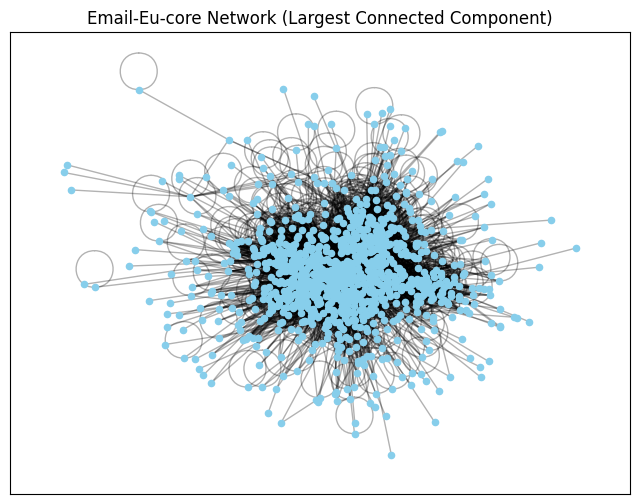

In [26]:
# Extract largest connected component
if not nx.is_connected(email):
    largest_cc = max(nx.connected_components(email), key=len)
    email_lcc = email.subgraph(largest_cc).copy()
    print("Largest connected component:", email_lcc.number_of_nodes(), "nodes,", email_lcc.number_of_edges(), "edges")
else:
    email_lcc = email

# Draw the LCC only
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(email_lcc, seed=42, k=0.1)
nx.draw_networkx_nodes(email_lcc, pos, node_size=20, node_color='skyblue')
nx.draw_networkx_edges(email_lcc, pos, alpha=0.3)
plt.title("Email-Eu-core Network (Largest Connected Component)")
plt.show()


In [28]:
# Centrality & Clustering Metrics (Email LCC)
# Degree centrality
degree_centrality_email = nx.degree_centrality(email_lcc)

# Closeness centrality
closeness_centrality_email = nx.closeness_centrality(email_lcc)

# Betweenness centrality
betweenness_centrality_email = nx.betweenness_centrality(email_lcc)

# Eigenvector centrality
eigenvector_centrality_email = nx.eigenvector_centrality(email_lcc)

# Local clustering coefficients
clustering_coeffs_email = nx.clustering(email_lcc)

# Display some sample values
print("Sample Centrality & Clustering Metrics (Email-Eu-core LCC):")
for n in list(email_lcc.nodes())[:5]:
    print(f"Node {n}: Degree {degree_centrality_email[n]:.3f}, Closeness {closeness_centrality_email[n]:.3f}, "
          f"Betweenness {betweenness_centrality_email[n]:.3f}, Eigenvector {eigenvector_centrality_email[n]:.3f}, "
          f"Clustering {clustering_coeffs_email[n]:.3f}")

# Compute global average clustering coefficient
avg_clustering_email = nx.average_clustering(email_lcc)
print("\nGlobal average clustering coefficient (Email-Eu-core LCC):", avg_clustering_email)


Sample Centrality & Clustering Metrics (Email-Eu-core LCC):
Node 0: Degree 0.045, Closeness 0.430, Betweenness 0.001, Eigenvector 0.019, Clustering 0.276
Node 1: Degree 0.053, Closeness 0.431, Betweenness 0.001, Eigenvector 0.029, Clustering 0.265
Node 2: Degree 0.096, Closeness 0.470, Betweenness 0.007, Eigenvector 0.053, Clustering 0.298
Node 3: Degree 0.072, Closeness 0.450, Betweenness 0.002, Eigenvector 0.047, Clustering 0.385
Node 4: Degree 0.097, Closeness 0.471, Betweenness 0.006, Eigenvector 0.061, Clustering 0.319

Global average clustering coefficient (Email-Eu-core LCC): 0.40705044751953817


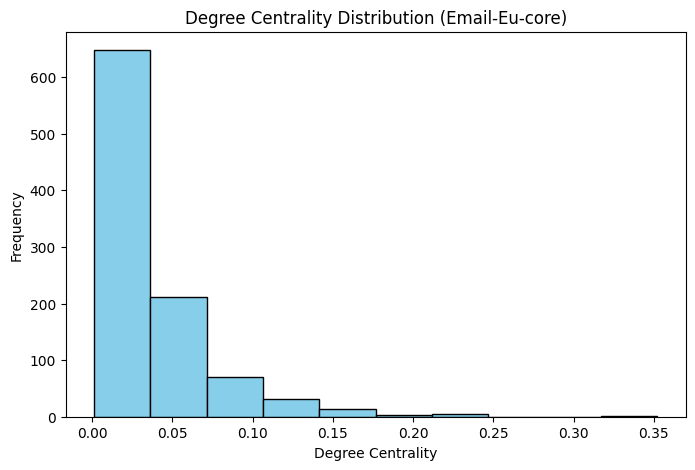

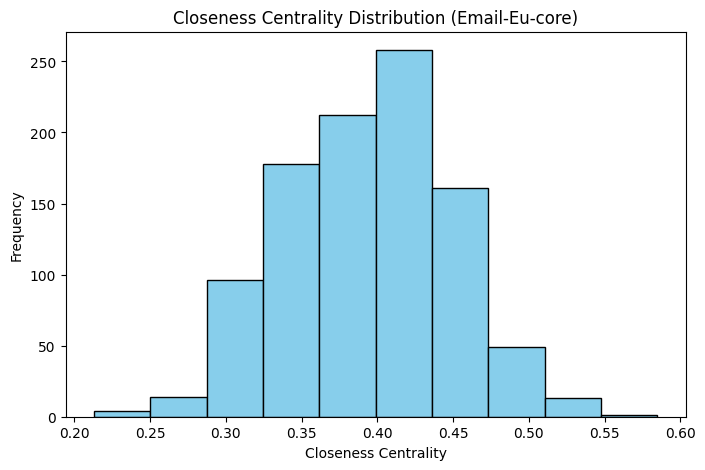

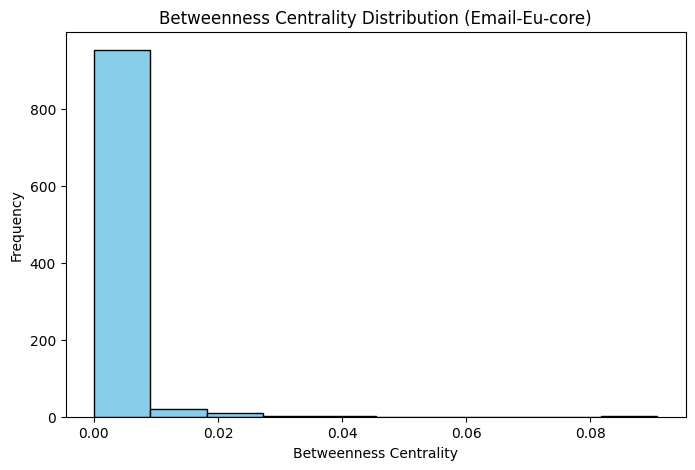

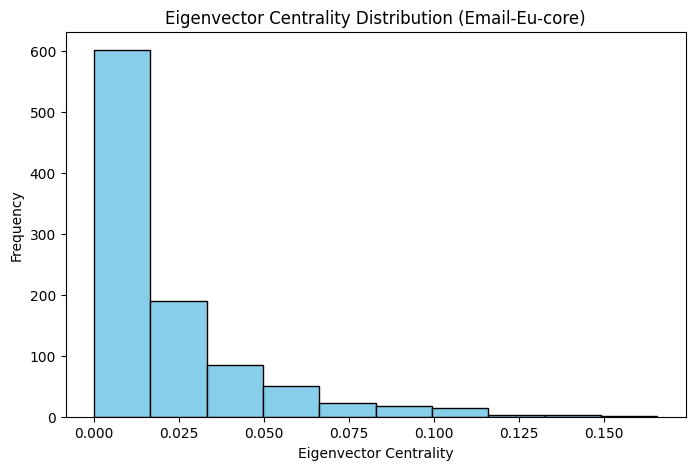

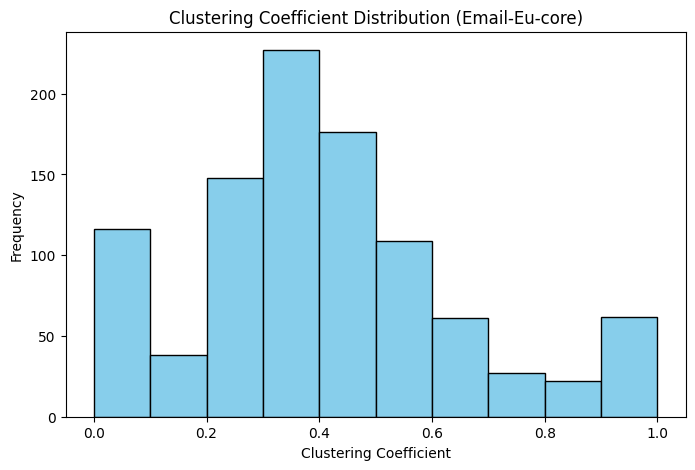

In [29]:
# Visualize Centrality Distributions (Email-Eu-core LCC)
# Helper function to plot centrality distributions
def plot_centrality_distribution_email(values, title, xlabel):
    plt.figure(figsize=(8, 5))
    plt.hist(list(values.values()), bins=10, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

# Plot degree centrality distribution
plot_centrality_distribution_email(degree_centrality_email, "Degree Centrality Distribution (Email-Eu-core)", "Degree Centrality")

# Plot closeness centrality distribution
plot_centrality_distribution_email(closeness_centrality_email, "Closeness Centrality Distribution (Email-Eu-core)", "Closeness Centrality")

# Plot betweenness centrality distribution
plot_centrality_distribution_email(betweenness_centrality_email, "Betweenness Centrality Distribution (Email-Eu-core)", "Betweenness Centrality")

# Plot eigenvector centrality distribution
plot_centrality_distribution_email(eigenvector_centrality_email, "Eigenvector Centrality Distribution (Email-Eu-core)", "Eigenvector Centrality")

# Plot clustering coefficient distribution
plot_centrality_distribution_email(clustering_coeffs_email, "Clustering Coefficient Distribution (Email-Eu-core)", "Clustering Coefficient")


First level communities detected by Girvan–Newman (Email-Eu-core LCC):
Community 1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]... (total 980 nodes)
Community 2: [414, 449, 603, 605, 846, 916]... (total 6 nodes)


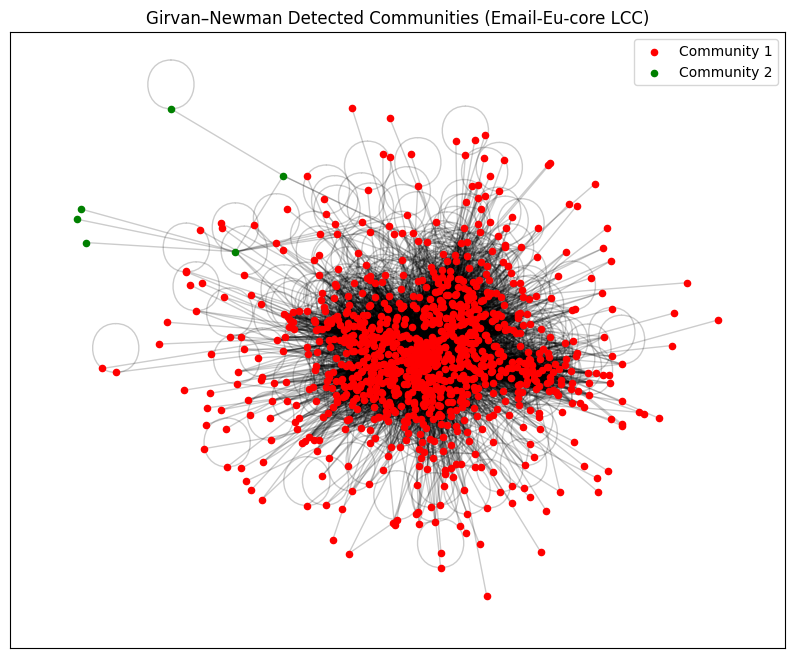

In [30]:
# Community detection using Girvan–Newman  — Email-Eu-core LCC
comp_email = girvan_newman(email_lcc)

# First level split
first_level_communities_email = next(comp_email)

# Convert to sorted lists
communities_email = [sorted(list(c)) for c in first_level_communities_email]
print("First level communities detected by Girvan–Newman (Email-Eu-core LCC):")
for i, c in enumerate(communities_email):
    print(f"Community {i+1}: {c[:10]}... (total {len(c)} nodes)")  # Only show first 10 nodes for readability

# Visualize the communities
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
pos = nx.spring_layout(email_lcc, seed=42, k=0.1)
for i, community in enumerate(first_level_communities_email):
    nx.draw_networkx_nodes(email_lcc, pos, nodelist=community, node_color=colors[i % len(colors)], label=f'Community {i+1}', node_size=20)
nx.draw_networkx_edges(email_lcc, pos, alpha=0.2)
plt.title("Girvan–Newman Detected Communities (Email-Eu-core LCC)")
plt.legend()
plt.show()


Number of communities detected by Louvain (Email-Eu-core LCC): 7


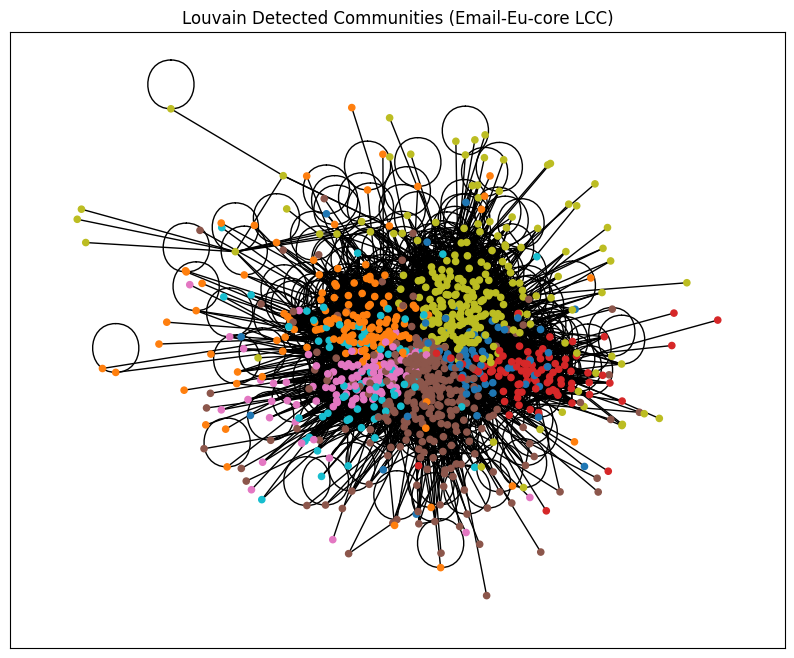

In [31]:
# Louvain community detection (Email-Eu-core LCC)
partition_email = community_louvain.best_partition(email_lcc)

# Number of communities
num_communities_email = len(set(partition_email.values()))
print("Number of communities detected by Louvain (Email-Eu-core LCC):", num_communities_email)

# Visualize the Louvain communities
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(email_lcc, seed=42, k=0.1)
colors = [partition_email[node] for node in email_lcc.nodes()]
nx.draw_networkx(email_lcc, pos, node_color=colors, with_labels=False, cmap=plt.cm.tab10, node_size=20)
plt.title("Louvain Detected Communities (Email-Eu-core LCC)")
plt.show()


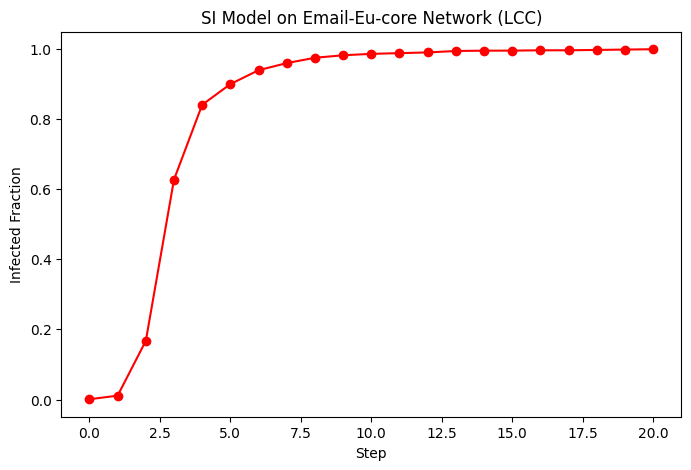

In [32]:
# SI Spreading Model (Email-Eu-core LCC)
# Reuse the SI simulation function
infected_fraction_email = simulate_si(email_lcc, beta=0.2, steps=20)

# Plot infected fraction over time
plt.figure(figsize=(8, 5))
plt.plot(infected_fraction_email, marker='o', color='red')
plt.title("SI Model on Email-Eu-core Network (LCC)")
plt.xlabel("Step")
plt.ylabel("Infected Fraction")
plt.show()
